In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


In [ ]:
df = pd.read_csv("Phishing_URL_Dataset.csv")

# Use ONLY required columns
X = df["URL"]
y = df["label"]   # 1 = Legitimate, 0 = Phishing


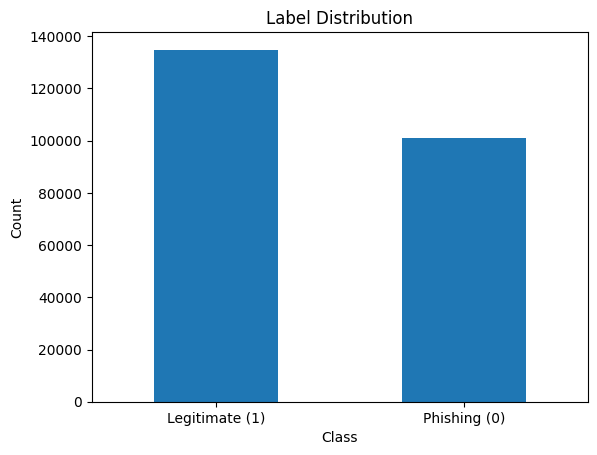

In [ ]:
df['label'].value_counts().plot(kind='bar')
plt.xticks([0,1], ["Legitimate (1)", "Phishing (0)"], rotation=0)
plt.title("Label Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


In [ ]:
X = df['URL']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [ ]:
tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(X_train)

MAX_LEN = 200

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq  = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=MAX_LEN)
X_test_pad  = pad_sequences(X_test_seq, maxlen=MAX_LEN)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense


In [ ]:
model = Sequential([
    Embedding(
        input_dim=len(tokenizer.word_index) + 1,
        output_dim=128,
        input_length=MAX_LEN
    ),
    LSTM(64),
    Dense(1, activation="sigmoid")
])

model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    X_train_pad,
    y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.2
)


Epoch 1/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 31s 11ms/step - accuracy: 0.9241 - loss: 0.1948 - val_accuracy: 0.9975 - val_loss: 0.0131
Epoch 2/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 27s 12ms/step - accuracy: 0.9939 - loss: 0.0253 - val_accuracy: 0.9973 - val_loss: 0.0137
Epoch 3/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 26s 11ms/step - accuracy: 0.9967 - loss: 0.0172 - val_accuracy: 0.9982 - val_loss: 0.0112
Epoch 4/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 26s 11ms/step - accuracy: 0.9980 - loss: 0.0119 - val_accuracy: 0.9982 - val_loss: 0.0111
Epoch 5/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 27s 12ms/step - accuracy: 0.9981 - loss: 0.0115 - val_accuracy: 0.9980 - val_loss: 0.0115
Epoch 6/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 27s 11ms/step - accuracy: 0.9981 - loss: 0.0114 - val_accuracy: 0.9983 - val_loss: 0.0104
Epoch 7/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 26s 11ms/step - accuracy: 0.9981 - loss: 0.0112 - val_accuracy: 0.9983 - val_loss: 0.0106
Epoch 8/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 27s 11ms/step - accuracy: 0.9981 -

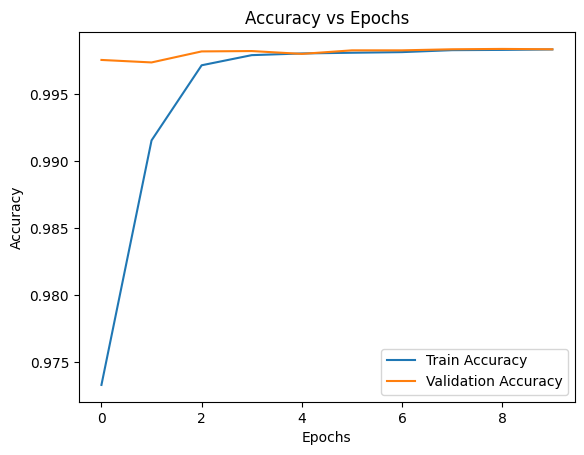

In [ ]:
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Epochs")
plt.legend()
plt.show()


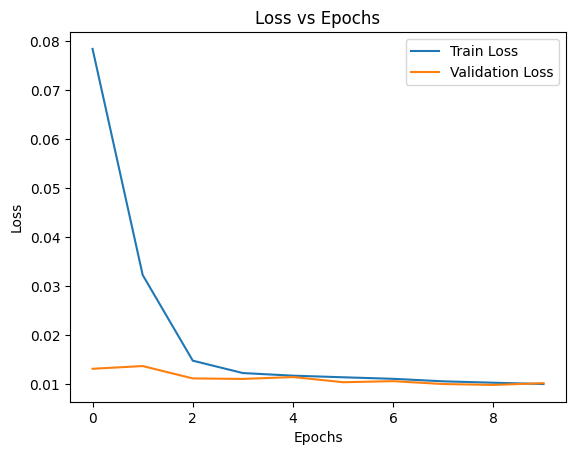

In [ ]:
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Epochs")
plt.legend()
plt.show()


In [ ]:
y_prob = model.predict(X_test_pad).flatten()
y_pred = (y_prob >= 0.5).astype(int)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(
    y_test, y_pred,
    target_names=["Phishing", "Legitimate"]
))


1474/1474 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step
Accuracy: 0.9980491528658368
              precision    recall  f1-score   support

    Phishing       1.00      1.00      1.00     20189
  Legitimate       1.00      1.00      1.00     26970

    accuracy                           1.00     47159
   macro avg       1.00      1.00      1.00     47159
weighted avg       1.00      1.00      1.00     47159



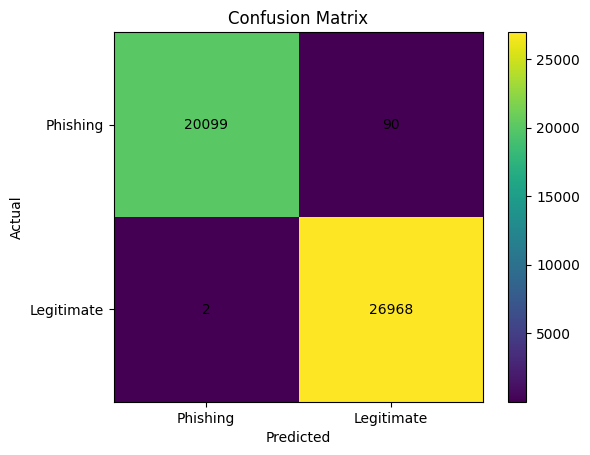

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.imshow(cm)
plt.colorbar()
plt.xticks([0, 1], ["Phishing", "Legitimate"])
plt.yticks([0, 1], ["Phishing", "Legitimate"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.show()


In [ ]:
def predict_url(url):
    seq = tokenizer.texts_to_sequences([url])
    pad = pad_sequences(seq, maxlen=MAX_LEN)
    prob = model.predict(pad)[0][0]

    if prob >= 0.5:
        return "Legitimate URL ✅"
    else:
        return "Phishing URL ❌"


In [ ]:
test_urls = [
    "https://www.google.com",
    "https://www.amazon.in",
    "http://secure-paypal-login.verify-user.com",
    "http://free-netflix-premium.xyz/login"
]

for url in test_urls:
    print(url, "->", predict_url(url))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
https://www.google.com -> Legitimate URL ✅
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
https://www.amazon.in -> Legitimate URL ✅
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
http://secure-paypal-login.verify-user.com -> Phishing URL ❌
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
http://free-netflix-premium.xyz/login -> Phishing URL ❌


In [ ]:
model.save("phishing_url_model.keras")

with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)


In [ ]:
y_prob = model.predict(X_test_pad)


1474/1474 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step


In [ ]:
y_pred = (y_prob >= 0.5).astype(int)


In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)


Model Accuracy: 0.9980491528658368


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(
    y_test,
    y_pred,
    target_names=["Phishing", "Legitimate"]
))


              precision    recall  f1-score   support

    Phishing       1.00      1.00      1.00     20189
  Legitimate       1.00      1.00      1.00     26970

    accuracy                           1.00     47159
   macro avg       1.00      1.00      1.00     47159
weighted avg       1.00      1.00      1.00     47159



In [ ]:
y_pred = (model.predict(X_test_pad) >= 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)


1474/1474 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step
0.9980491528658368


In [ ]:
model.save("phishing_url_model.keras")

import pickle
with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)


In [ ]:
import os
os.listdir()


['.config',
 'Phishing_URL_Dataset.csv',
 'tokenizer.pkl',
 'phishing_url_model.keras',
 'sample_data']

In [ ]:
from tensorflow.keras.models import load_model
import pickle

model = load_model("phishing_url_model.keras")

with open("tokenizer.pkl", "rb") as f:
    tokenizer = pickle.load(f)


In [ ]:
def predict_url(url):
    seq = tokenizer.texts_to_sequences([url])
    pad = pad_sequences(seq, maxlen=MAX_LEN)
    prob = model.predict(pad)[0][0]
    return "Legitimate URL ✅" if prob >= 0.5 else "Phishing URL ❌"

print(predict_url("https://www.google.com"))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
Legitimate URL ✅


In [ ]:
import os

os.makedirs("Phishing_URL_Project/model", exist_ok=True)
os.makedirs("Phishing_URL_Project/dataset", exist_ok=True)
os.makedirs("Phishing_URL_Project/results", exist_ok=True)



In [ ]:
import shutil

# move model
shutil.move("phishing_url_model.keras",
            "Phishing_URL_Project/model/phishing_url_model.keras")

# move tokenizer
shutil.move("tokenizer.pkl",
            "Phishing_URL_Project/model/tokenizer.pkl")

# move dataset
shutil.move("Phishing_URL_Dataset.csv",
            "Phishing_URL_Project/dataset/Phishing_URL_Dataset.csv")


'Phishing_URL_Project/dataset/Phishing_URL_Dataset.csv'

In [ ]:
os.listdir("Phishing_URL_Project")


['dataset', 'results', 'model']

In [ ]:
os.listdir("Phishing_URL_Project/model")


['tokenizer.pkl', 'phishing_url_model.keras']